In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve
from  sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
data = pd.read_csv(r'C:\Users\wipip\OneDrive\Documentos\GitHub\Naive-Bayes-Project-main\data\interim\ps_reviews_before_vectorization.csv')

Hacemos el split de train y test para nuestro data set.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['polarity'], test_size=.2, random_state=42 )

Utilizamos count vectorizer para vectorizar de forma simple los comentarios en unidades que sean introducibles y utilizables para el modelo. 

In [ ]:
vector_mod = CountVectorizer(stop_words="english")
X_train = vector_mod.fit_transform(X_train).toarray()
X_test = vector_mod.transform(X_test).toarray()

aplicamos el modelo de naive bayes multinomial, ya que este es el modelo que se utiliza cuando necesitamos un modelo que use datos categoricos de conteo como es el conteo de palabras en un texto. 

In [20]:
modelo = MultinomialNB()
modelo.fit(X_train, y_train)
predictions = modelo.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8156424581005587


Utilizamos un search grid para encontrar los mejores valores de hiperparametro para nuestro modelo multinomial. Utilizando 5 particiones para hacer validacion cruzada y probando con 100 valores diferentes de suavizado aditivo alpha para determinar el punto en el que mejor se ajusta el modelo para mejorar la precision

In [13]:
param_grid = {
    'alpha': np.linspace(0.1, 1, 100)
}

grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Mejor precision obtenida: {accuracy}")
print(f"Mejores parametros: {grid_search.best_params_}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejor precision obtenida: 0.8212290502793296
Mejores parametros: {'alpha': 0.6}


Una vez que tenemos esto veremos el rendimiento con diferentes metricas como la matriz de confusion, el reporte de clasificacion y la curva roc. 

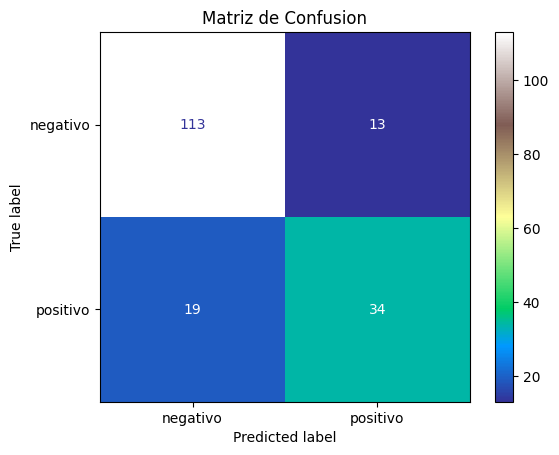

Reporte de clasificacion
              precision    recall  f1-score   support

    negativo       0.86      0.90      0.88       126
    positivo       0.72      0.64      0.68        53

    accuracy                           0.82       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.82      0.82      0.82       179



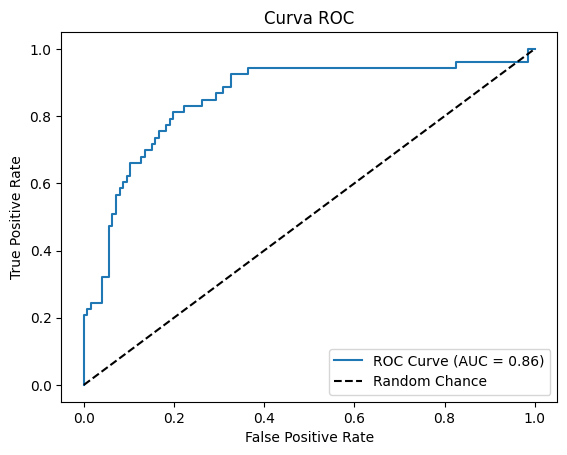

In [14]:
matriz_confusion = confusion_matrix(y_test, predictions)
matriz_plot = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['negativo', 'positivo'])
matriz_plot.plot(cmap='terrain')
plt.title('Matriz de Confusion')
plt.show()

reporte_clasificacion = classification_report(y_test, predictions, target_names=['negativo', 'positivo'])
print('Reporte de clasificacion')
print(reporte_clasificacion)

y_probabilidad = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probabilidad)
auc_score = roc_auc_score(y_test, y_probabilidad)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

Interpretaremos principalmente el reporte de clasificacion ya que es el que mayor informacion nos da respecto al desepenio de nuestro modelo. 

Para la clase "negativo":
Podremos ver que tenemos un 86% de negativos correctos. 
un recall de 90%, lo que nos dice que el modelo identifico correctamente 90% de los valores negativos. 

Tenemos un F1-Score de 88% lo que nos dice que el balance entre precision y recall es adecuado y sigue dando un valor alto para la prediccion. 

para la clase 'positivo':

Tendremos una precision de 72%, un recall de 64% y un f1 score de 68%, esto nos dice que el desempenio del modelo para identificar positivos es mas bajo, pero tambien toma en cuenta que hay 53 ejemplos donde es positivo y 126 donde es negativo. Tambien tenemos que tomar en cuenta que no se estan captando todos los valores positivos de forma ideal, ya que el 64% es un valor bajo. 


Ahora vamos a utilizar otro metodo de vectorizacion para los comentarios, para ver si esta parte de preprocesamiento mejora el rendimiento de nuestro modelo, utilizaremos TfidVectorizer en lugar de Count vectorizer.

Esto es debido a que en la literatura podemos consultar que TfidVectorizer es una herramienta mas util para el objetivo de este proyecto, ya que necesitamos clasificar comentarios com positivos o negativos, por lo que con este vectorizador podremos enfocar terminos distintivos de cada clase en lugar de solo contar la frecuencia de palabras, enfocar en terminos para cada clase es crucial para optimizar la funcion del modelo, tambien tendremos una ponderacion mas baja de las palabras comunes, asi como una capacidad de discriminar terminos mas alta, dandonos un peso mayor a terminos de mayor informacion para el modelo. 

In [21]:
X_train_tfi, X_test_tfi, y_train_tfi, y_test_tfi = train_test_split(data["review"], data["polarity"], test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(stop_words="english")
X_train_tfi = tfidf.fit_transform(X_train_tfi).toarray()
X_test_tfi = tfidf.transform(X_test_tfi).toarray()

grid_1_tfi = {
    'alpha': np.linspace(0.1, 1, 100)
}
grid_search_1_tfi = GridSearchCV(MultinomialNB(), grid_1_tfi, cv=5, verbose=1)

grid_search_1_tfi.fit(X_train_tfi, y_train_tfi)

best_model_1_tfi = grid_search_1_tfi.best_estimator_

predictions_1_tfi = best_model_1_tfi.predict(X_test_tfi)

accuracy_1 = accuracy_score(y_test_tfi, predictions_1_tfi)
print(f"Best Model Accuracy: {accuracy_1}")
print(f"Best Parameters: {grid_search_1_tfi.best_params_}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Model Accuracy: 0.8324022346368715
Best Parameters: {'alpha': 0.15454545454545454}


Inicialmente vemos una mejora en la precision, por lo que haremos un reporte de clasificacion para determinar los pormenores. 

In [22]:
reporte_clasificacion_tfi = classification_report(y_test_tfi, predictions_1_tfi, target_names=['negativo', 'positivo'])
print('Reporte de clasificacion Con vectorizacion tfi')
print(reporte_clasificacion_tfi)

Reporte de clasificacion Con vectorizacion tfi
              precision    recall  f1-score   support

    negativo       0.84      0.94      0.89       126
    positivo       0.79      0.58      0.67        53

    accuracy                           0.83       179
   macro avg       0.82      0.76      0.78       179
weighted avg       0.83      0.83      0.82       179



Comparando los resultados podemos ver una mejora en la precision general acompaniada de una disminucion ligera en la precision de negativos junto con aumento de recall, lo que nos dice que ahora captura mas ejemplos verdaderos de negativo, tambien una mejora en la precision de positivos conjunta con un menor recall positivo. 
Para las metricas globales, vemos una mejora en la precision global como se mencionaba incialmente, junto con una mejora en la precision macro y una reduccion en el recall, esto se debe a la disminucion del recall en valores positivos. mientras que el f1 score se queda igual lo que nos indica que no hubo un cambio significativo entre la precision y el recall utilizando diferente vectorizacion. 

En conclusion, utilizando otro metodo de vectorizacion hemos logrado mejorar la precision en terminos generales, sin embargo seguimos viendo el problema de recall en los positivos.
Este problema de identificar las clases positivas puede ser abordado con varias tecnicas como el sobremuestreo de la clase positiva o el ajuste de umbral de clasificacion. 